<a href="https://colab.research.google.com/github/onmax/bike-forecasting/blob/main/src/models/one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/onmax/bike-forecasting/
%cd bike-forecasting/src/models

In [ ]:
!pip3 install tensorflow keras livelossplot tensorboard pandas >> /dev/null

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import sys

sys.path.insert(1, '../../preprocessing/')
sys.path.insert(1, '../../graphs/')
sys.path.insert(1, '..')
from window import WindowGenerator
from model_lib import compile_and_fit
from dataset_lib import load_dataset, split_dataset
from lr import lr_timeline
from predictions import plot_predictions


In [3]:
df = load_dataset("/..")

Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/recurrent/../../../data/files/../parts/chicago-divvy-trips-part-3


In [4]:
train_df, val_df = split_dataset(df, train_from=datetime(2018, 1, 1))
num_features = train_df.shape[1]

Training from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Validating from 2019-01-01 00:00:00 to 2019-12-31 23:00:00


In [5]:
train_df

,quantity_1,quantity_100,quantity_101,quantity_102,quantity_103,quantity_106,quantity_107,quantity_108,quantity_109,quantity_11,...,quantity_93,quantity_94,quantity_95,quantity_96,quantity_97,quantity_98,quantity_99,hour,day_of_week,month
start_time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,1
2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,1,1
2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,1
2018-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,1
2018-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19,1,12
2018-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,1,12
2018-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,1,12


In [5]:
OUT_STEPS = 1
window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=train_df, val_df=val_df)

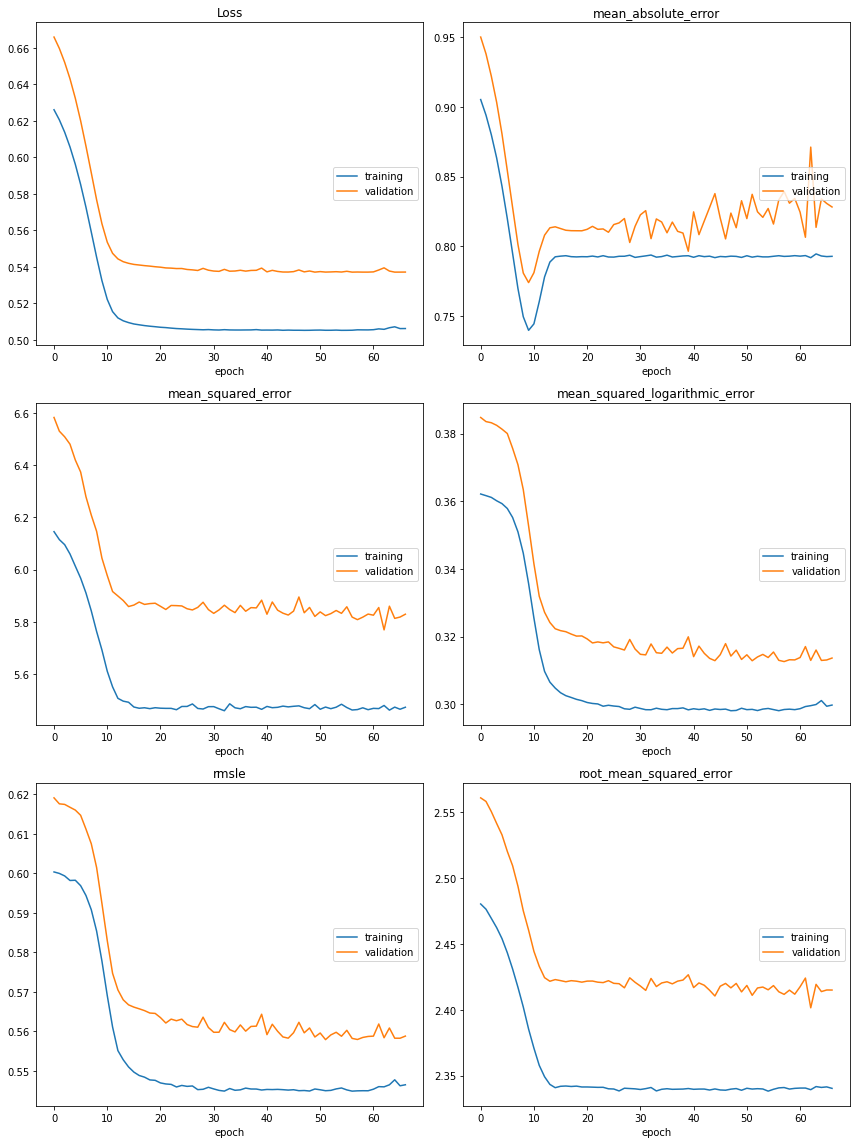

Loss
	training         	 (min:    0.505, max:    0.626, cur:    0.506)
	validation       	 (min:    0.537, max:    0.666, cur:    0.537)
mean_absolute_error
	training         	 (min:    0.740, max:    0.905, cur:    0.793)
	validation       	 (min:    0.774, max:    0.950, cur:    0.828)
mean_squared_error
	training         	 (min:    5.459, max:    6.146, cur:    5.473)
	validation       	 (min:    5.769, max:    6.583, cur:    5.829)
mean_squared_logarithmic_error
	training         	 (min:    0.298, max:    0.362, cur:    0.300)
	validation       	 (min:    0.313, max:    0.385, cur:    0.314)
rmsle
	training         	 (min:    0.545, max:    0.600, cur:    0.546)
	validation       	 (min:    0.558, max:    0.619, cur:    0.559)
root_mean_squared_error
	training         	 (min:    2.338, max:    2.480, cur:    2.340)
	validation       	 (min:    2.401, max:    2.561, cur:    2.415)
137/137 - 22s - loss: 0.5063 - mean_squared_logarithmic_error: 0.2998 - mean_squared_error: 5.4726 - me

In [6]:
model = tf.keras.Sequential([
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(1)
])
history = compile_and_fit(model, window, should_stop=True, max_epochs=100, lr_schedule_fn=(lambda epoch: 1e-7 * 10**(epoch/10)))

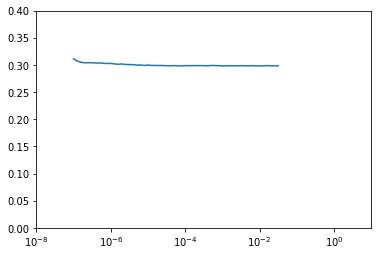

In [21]:
lr_timeline(history, [1e-8, 1e1, 0, 0.4], "mean_squared_logarithmic_error") 

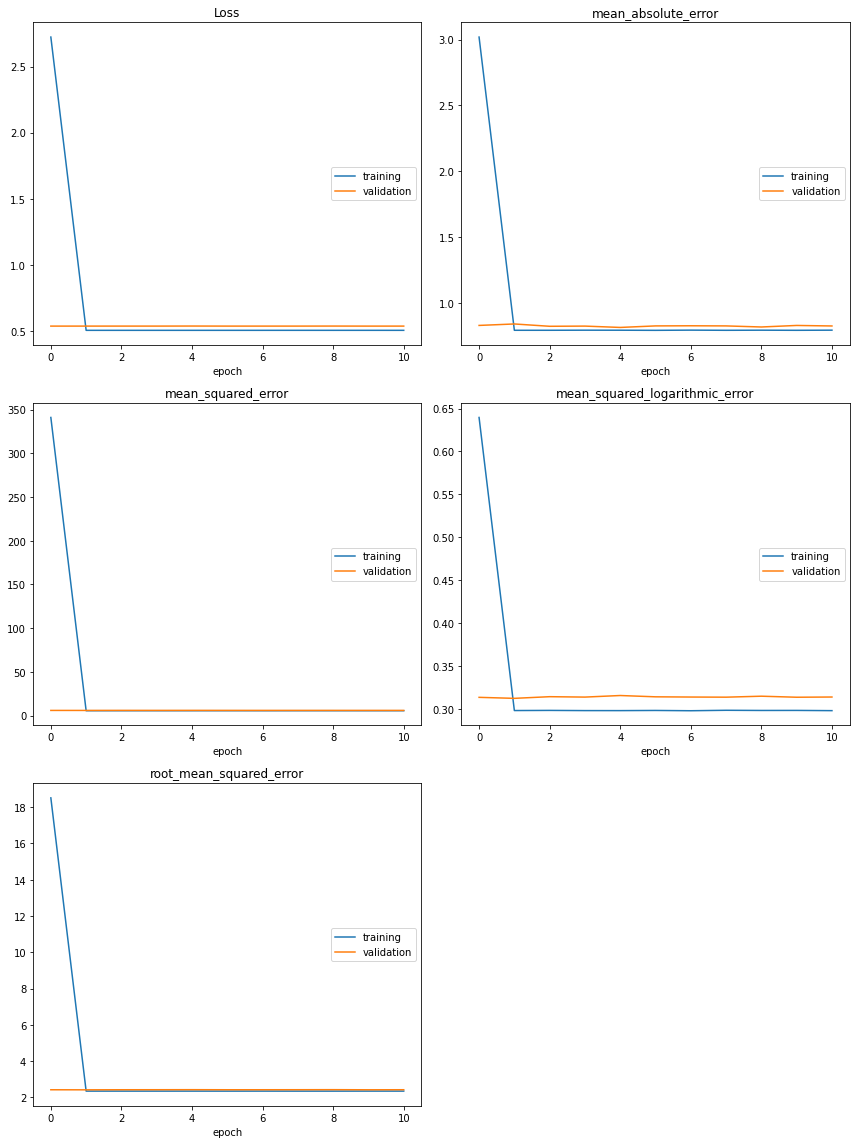

Loss
	training         	 (min:    0.505, max:    2.723, cur:    0.505)
	validation       	 (min:    0.537, max:    0.538, cur:    0.537)
mean_absolute_error
	training         	 (min:    0.792, max:    3.019, cur:    0.793)
	validation       	 (min:    0.814, max:    0.841, cur:    0.825)
mean_squared_error
	training         	 (min:    5.465, max:  341.037, cur:    5.470)
	validation       	 (min:    5.813, max:    5.865, cur:    5.835)
mean_squared_logarithmic_error
	training         	 (min:    0.298, max:    0.640, cur:    0.298)
	validation       	 (min:    0.312, max:    0.316, cur:    0.314)
root_mean_squared_error
	training         	 (min:    2.338, max:   18.517, cur:    2.340)
	validation       	 (min:    2.411, max:    2.419, cur:    2.416)
137/137 - 33s - loss: 0.5052 - mean_squared_logarithmic_error: 0.2982 - mean_squared_error: 5.4697 - mean_absolute_error: 0.7935 - root_mean_squared_error: 2.3395 - val_loss: 0.5372 - val_mean_squared_logarithmic_error: 0.3140 - val_mean_squ

In [23]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dense(633, activation="relu"),
    Dense(1)
])
history = compile_and_fit(model, window, lr=0.001, should_stop=True, max_epochs=100, tensorboard=True)

In [13]:
plot_predictions(window, model, 10)

ValueError: x and y must be the same size